<https://github.com/allydato/week2>

In [190]:
# 0. Import the data and declare your package dependencies.
import numpy as np
import pandas as pd
from plotnine import *
avocado = pd.read_csv("/content/avocado-updated-2020.csv")

In [191]:
# 1. Briefly describe the data set. What information does it contain?
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   4046           33045 non-null  float64
 4   4225           33045 non-null  float64
 5   4770           33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB


The data set observes avocado sales including date, average price, total volume, PLU number (4046, 4225, or 4770), bag size (total, small, large, and extra large), type, year, and geography. The first 1 and last 3 variables can be considered categorical and the rest numerical. The data set contains 33,045 rows and 13 columns.

In [192]:
# 2. Clean the data in any way you see fit.
avocado_clean = avocado.copy()

In [193]:
# rename plu numbers to avocado sizes
avocado_clean = avocado_clean.rename(columns = {"4046": "small", "4225": "large", "4770": "xlarge"})

In [258]:
# add geo_type column
def func_geo_type(geography):
  if geography == "Great Lakes" or geography == "Midsouth" or geography == "Northeast" \
  or geography == "Northern New England" or geography == "Plains" or geography == "South Central" \
  or geography == "Southeast" or geography == "West" or geography == "West Tex/New Mexico":
    return "major"
  elif geography == "California":
    return "state"
  elif geography == "Total U.S.":
    return "total"
  else:
    return "metro"
avocado_clean["geo_type"] = avocado_clean["geography"].apply(func_geo_type)

In [227]:
# 3. Which major geographical region sold the most total organic, small Hass avocados in 2017?
avocado_clean_3 = avocado_clean.copy()
avocado_clean_3 = avocado_clean_3[(avocado_clean_3["geo_type"] == "major") & (avocado_clean_3["year"] == 2017) \
                                & (avocado_clean_3["type"] == "organic")]
avocado_clean_3["total_small"] = avocado_clean_3["small"] + avocado_clean_3["small_bags"]
avocado_clean_3 = avocado_clean_3[["geo_type", "year", "type", "small", "small_bags", "total_small", "geography"]]
avocado_clean_3.loc[avocado_clean_3["total_small"] == avocado_clean_3["total_small"].max()]
# ANSWER: Northeast

,geo_type,year,type,small,small_bags,total_small,geography
15608,major,2017,organic,11078.6,238752.11,249830.71,Northeast


In [226]:
# 4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?
avocado_clean_4 = avocado_clean.copy()
avocado_clean_4["date_ver2"] = pd.to_datetime(avocado_clean_4["date"])
avocado_clean_4["month"] = avocado_clean_4["date_ver2"].dt.month
avocado_clean_4["day"] = avocado_clean_4["date_ver2"].dt.day
avocado_clean_4["year_ver2"] = avocado_clean_4["date_ver2"].dt.year
mean = avocado_clean_4.groupby("month")["total_volume"].mean()
avocado_clean_4["monthly_average"] = avocado_clean_4["month"].apply(lambda x: mean[x])
avocado_clean_4 = avocado_clean_4[["date_ver2", "month", "monthly_average"]]
avocado_clean_4.loc[avocado_clean_4["monthly_average"] == avocado_clean_4["monthly_average"].max()].head(1)
# ANSWER: May


,date_ver2,month,monthly_average
1836,2015-05-03,5,1.123632e+06


In [260]:
# 5. Which metro area geographical regions sold the most total avocados?
avocado_clean_5 = avocado_clean.copy()
avocado_clean_5 = avocado_clean_5[avocado_clean_5["geo_type"] == "metro"]
avocado_clean_5 = avocado_clean_5[["geo_type", "total_volume", "geography"]]
avocado_clean_5.loc[avocado_clean_5["total_volume"] == avocado_clean_5["total_volume"].max()]
# ANSWER: Southeast

,geo_type,total_volume,geography
22721,metro,5660216.21,Los Angeles


   geo_type  total_volume         geography  average_volume
44    metro    2682159.95       Los Angeles    1.567566e+06
56    metro    1402890.20          New York    8.631458e+05
22    metro    1086363.97  Dallas/Ft. Worth    7.127519e+05
36    metro    1062990.62           Houston    6.876533e+05
66    metro    1048062.16    Phoenix/Tucson    6.250383e+05


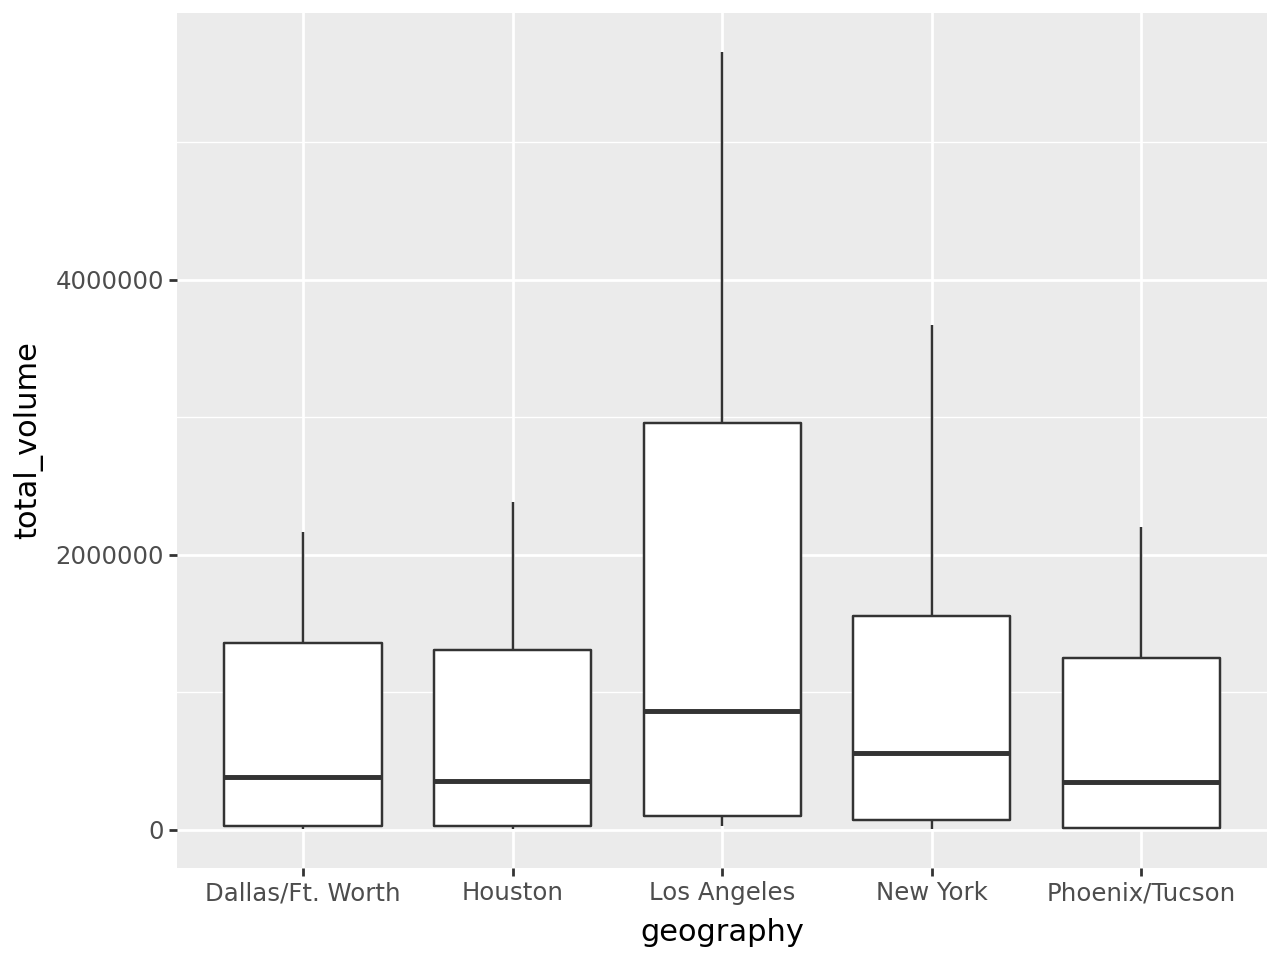

In [269]:
# 5. Plot side-by-side box-plots of the total volume for only the five metro geographical regions
# with the highest averages for the total_volume variable.
mean_2 = avocado_clean_5.groupby("geography")["total_volume"].mean()
avocado_clean_5["average_volume"] = avocado_clean_5["geography"].apply(lambda x: mean_2[x])
subset = avocado_clean_5.drop_duplicates(subset = ["geography"])
subset = subset.sort_values(by = "average_volume", ascending = False)
print(subset.head())
avocado_clean_5 = avocado_clean_5[(avocado_clean_5["geography"] == "Los Angeles") | (avocado_clean_5["geography"] == "New York") \
                                  | (avocado_clean_5["geography"] == "Dallas/Ft. Worth") | (avocado_clean_5["geography"] == "Houston") \
                                  | (avocado_clean_5["geography"] == "Phoenix/Tucson")]
ggplot(avocado_clean_5, aes(x = "geography", y = "total_volume")) + geom_boxplot()

In [369]:
# 6. From your cleaned data set, create a data set with only these California regions...
avocado_clean_ca = avocado_clean.copy()
avocado_clean_ca = avocado_clean_ca[(avocado_clean_ca["geography"] == "Los Angeles") | (avocado_clean_ca["geography"] == "San Diego") | \
                                    (avocado_clean_ca["geography"] == "Sacramento") | (avocado_clean_ca["geography"] == "San Francisco")]

In [367]:
# 7. In which California regions is the price of organic versus conventional avocados most different?
avocado_clean_ca = avocado_clean_ca[["average_price", "type", "geography"]]
org_la = avocado_clean_ca[(avocado_clean_ca["type"] == "organic") & (avocado_clean_ca["geography"] == "Los Angeles")]
conv_la = avocado_clean_ca[(avocado_clean_ca["type"] == "conventional") & (avocado_clean_ca["geography"] == "Los Angeles")]
diff_la = org_la["average_price"].mean() - conv_la["average_price"].mean()
print(f"LA mean difference: {diff_la}")
org_sd = avocado_clean_ca[(avocado_clean_ca["type"] == "organic") & (avocado_clean_ca["geography"] == "San Diego")]
conv_sd = avocado_clean_ca[(avocado_clean_ca["type"] == "conventional") & (avocado_clean_ca["geography"] == "San Diego")]
diff_sd = org_sd["average_price"].mean() - conv_sd["average_price"].mean()
print(f"SD mean difference: {diff_sd}")
org_sac = avocado_clean_ca[(avocado_clean_ca["type"] == "organic") & (avocado_clean_ca["geography"] == "Sacramento")]
conv_sac = avocado_clean_ca[(avocado_clean_ca["type"] == "conventional") & (avocado_clean_ca["geography"] == "Sacramento")]
diff_sac = org_sac["average_price"].mean() - conv_sac["average_price"].mean()
print(f"SAC mean difference: {diff_sac}")
org_sf = avocado_clean_ca[(avocado_clean_ca["type"] == "organic") & (avocado_clean_ca["geography"] == "San Francisco")]
conv_sf = avocado_clean_ca[(avocado_clean_ca["type"] == "conventional") & (avocado_clean_ca["geography"] == "San Francisco")]
diff_sf = org_sf["average_price"].mean() - conv_sf["average_price"].mean()
print(f"SF mean difference: {diff_sf}")
# ANSWER: San Diego
print(f"LA organic std: {org_la['average_price'].std()}")
print(f"LA conventional std: {conv_la['average_price'].std()}")
print(f"SD organic std: {org_sd['average_price'].std()}")
print(f"SD conventional std: {conv_sd['average_price'].std()}")
print(f"SAC organic std: {org_sac['average_price'].std()}")
print(f"SAC conventional std: {conv_sac['average_price'].std()}")
print(f"SF organic std: {org_sf['average_price'].std()}")
print(f"SF conventional std: {conv_sf['average_price'].std()}")

LA mean difference: 0.5277777777777777
SD mean difference: 0.6845098039215689
SAC mean difference: 0.5784967320261438
SF mean difference: 0.7189542483660132
LA organic std: 0.31172206545976716
LA conventional std: 0.23116716881481
SD organic std: 0.3316554750336406
SD conventional std: 0.24296022526265626
SAC organic std: 0.2928752303761408
SAC conventional std: 0.21917737750855815
SF organic std: 0.39585394539373814
SF conventional std: 0.2720596997562059


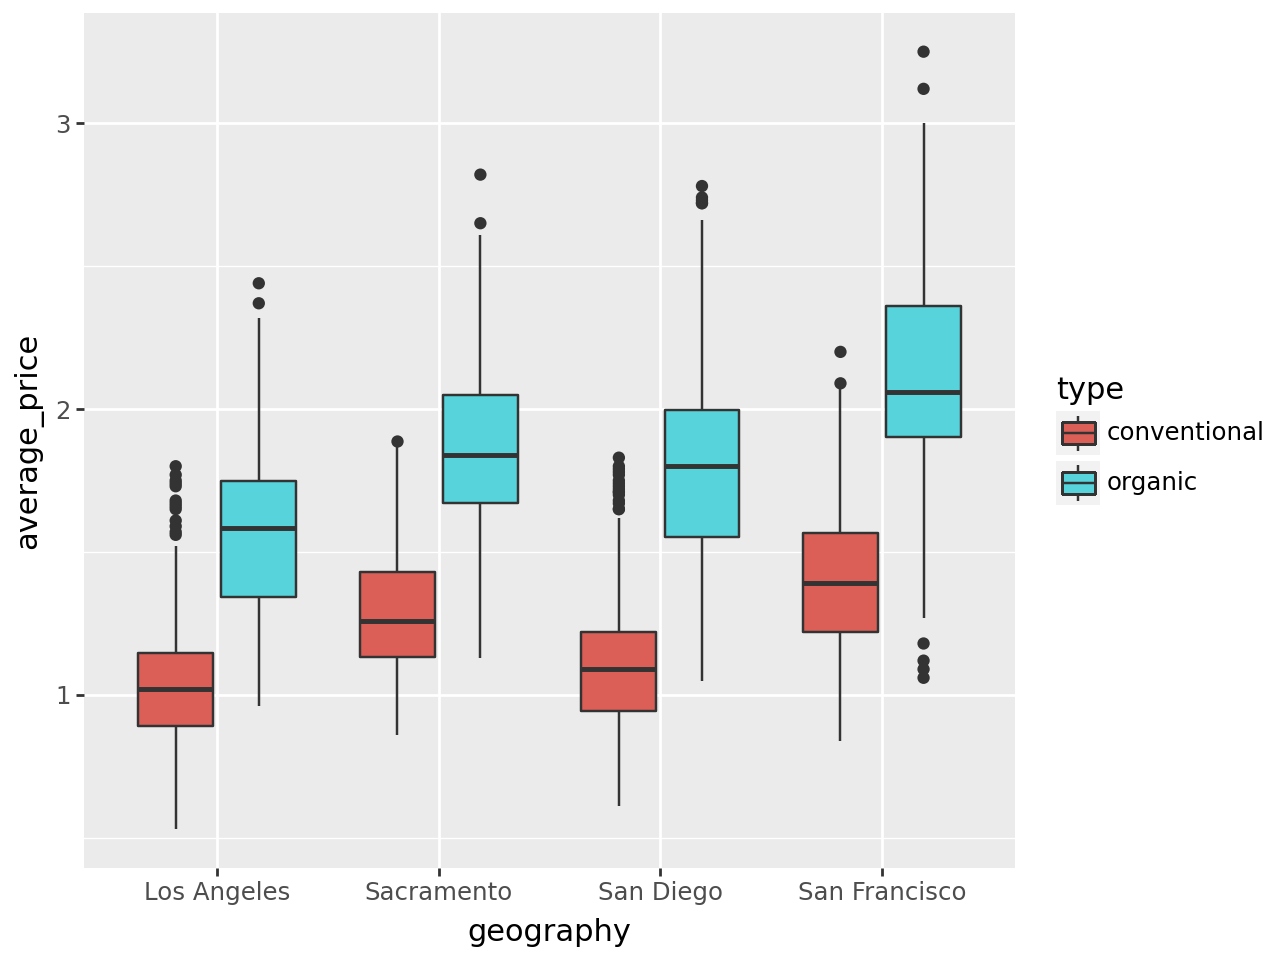

In [368]:
# 7. Support your answer with a few summary statistics AND a visualization.
(ggplot(avocado_clean_ca, aes(x = "geography", y = "average_price", fill = "type")) + geom_boxplot())

## Using Outside Data

In [494]:
# Find or assemble a data set of real data, with house prices for these four California regions.
housing = pd.read_csv("/content/CASTHPI.csv")

In [495]:
# ...make an argument about the relationship between house prices and avocado prices/sales.
housing["year"] = pd.to_datetime(housing["observation_date"])
housing["year"] = housing["year"].dt.year
mean = housing.groupby("year")["CASTHPI"].mean()
housing["mean_CASTHPI"] = housing["year"].apply(lambda x: mean[x])
housing = housing.drop_duplicates(subset=['year'])
housing = housing[["year", "mean_CASTHPI"]]

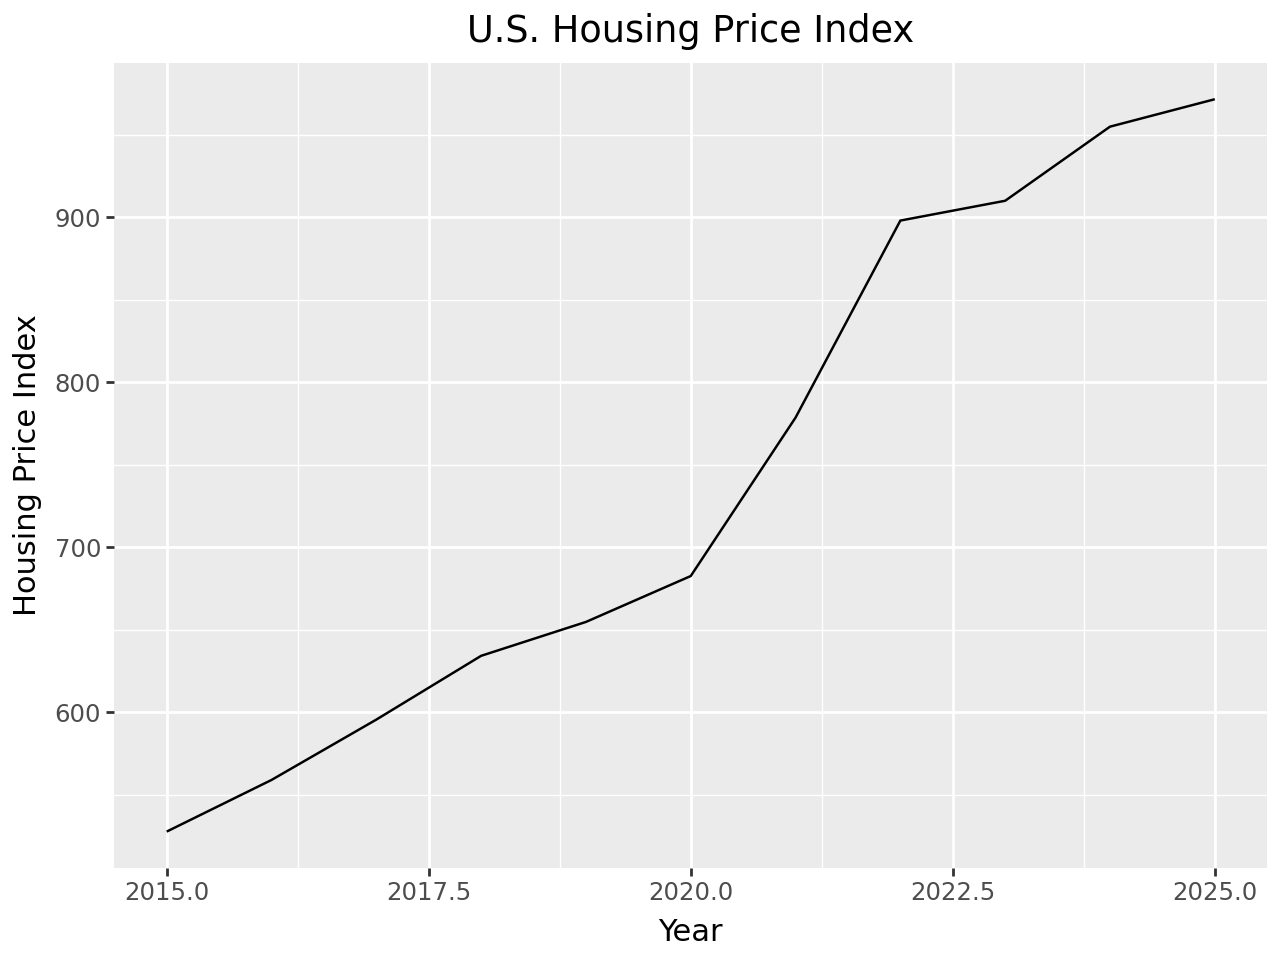

In [512]:
# Support your argument with a plot.
(ggplot(housing,
aes(
  x = "year",
  y = "mean_CASTHPI"
))
+ geom_line()
+ labs(title = "U.S. Housing Price Index", x = "Year", y = "Housing Price Index"))

In [506]:
avocado_clean = avocado_clean[["average_price", "year"]]
mean_2 = avocado_clean.groupby("year")["average_price"].mean()
avocado_clean["year_price"] = avocado_clean["year"].apply(lambda x: mean_2[x])
avocado_clean = avocado_clean.drop_duplicates(subset=['year'])
avocado_clean

,average_price,year,year_price
0,1.22,2015,1.22
5615,1.03,2016,1.03
11231,1.47,2017,1.47
16953,1.47,2018,1.47
22245,1.07,2019,1.07
27861,0.92,2020,0.92


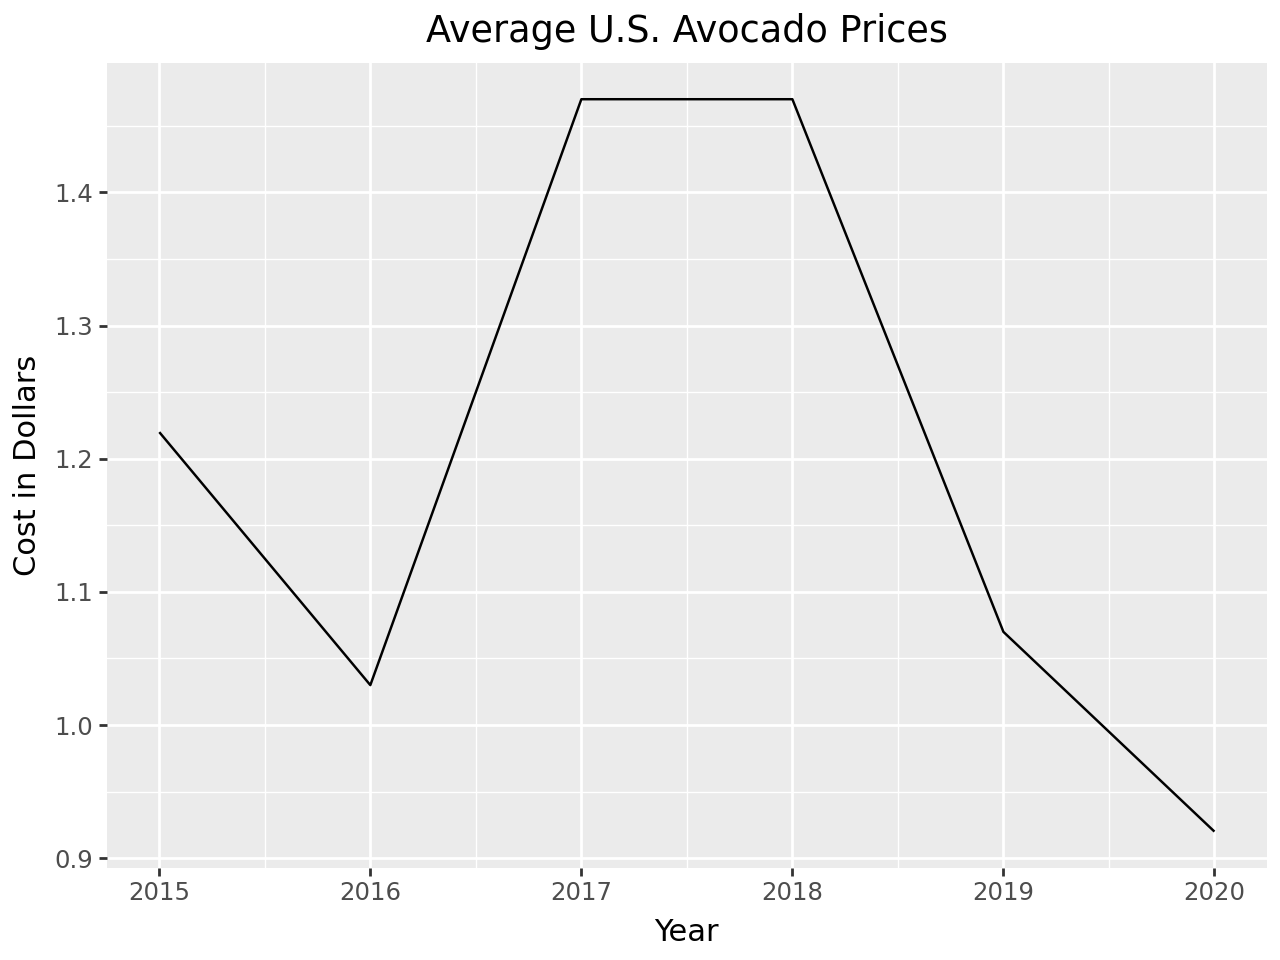

In [511]:
(ggplot(avocado_clean,
aes(
  x = "year",
  y = "year_price"
))
+ geom_line()
+ labs(title = "Average U.S. Avocado Prices", x = "Year", y = "Cost in Dollars"))

Argument: U.S. housing price index has gone up over the years, but avocado prices peaked around 2017-2018 and has been decreasing since. Houses cost way more than avocados in relativity.